In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
df_products = pd.read_excel('Product_list.xls')
df_products

,Category,Length_S,Length_M,Length_L,Width_S,Width_M,Width_L,Height_S,Height_M,Height_L
0,Shirt,350,375,400,200,220,250,10,12,15
1,Pants,400,450,500,250,275,300,15,18,21
2,Socks,100,110,120,75,77,80,5,5,5
3,Box of cereals,250,250,250,150,150,150,10,10,10
4,Can of tuna,110,110,110,110,110,110,7,7,7
5,Bag of rice,540,540,540,350,350,350,250,250,250
6,Toolbox,600,600,600,380,380,380,350,350,350
7,Box of nails,150,150,150,120,120,120,80,80,80
8,Glue gun,380,380,380,80,80,80,80,80,80


In [7]:
df_products.set_index('Category', inplace=True)
df_products

,Length_S,Length_M,Length_L,Width_S,Width_M,Width_L,Height_S,Height_M,Height_L
Category,,,,,,,,,
Shirt,350,375,400,200,220,250,10,12,15
Pants,400,450,500,250,275,300,15,18,21
Socks,100,110,120,75,77,80,5,5,5
Box of cereals,250,250,250,150,150,150,10,10,10
Can of tuna,110,110,110,110,110,110,7,7,7
Bag of rice,540,540,540,350,350,350,250,250,250
Toolbox,600,600,600,380,380,380,350,350,350
Box of nails,150,150,150,120,120,120,80,80,80
Glue gun,380,380,380,80,80,80,80,80,80


In [11]:
df_products.loc['Can of tuna']['Length_S']

110

In [12]:
def random_skus(articles, vertical):
    random_dict = {}
    for i in range(1, articles + 1, 1):
        if vertical == 'Fashion':
            category = np.random.choice(['Shirt', 'Pants', 'Socks'])
            size = np.random.choice(['S', 'M', 'L'])
            length = abs(round(np.random.normal(df_products.loc[category]['Length_' + size], 10, 1)[0],0))
            width = abs(round(np.random.normal(df_products.loc[category]['Width_' + size], 7, 1)[0],0))
            height = abs(round(np.random.normal(df_products.loc[category]['Height_' + size], 5, 1)[0],0))
        elif vertical == 'Food':
            category = np.random.choice(['Box of cereals', 'Can of tuna', 'Bag of rice'])
            length = df_products.loc[category]['Length_S']
            width = df_products.loc[category]['Width_S']
            height = df_products.loc[category]['Height_S']
        else:
            category = np.random.choice(['Toolbox', 'Box of nails', 'Glue gun'])
            length = df_products.loc[category]['Length_S']
            width = df_products.loc[category]['Width_S']
            height = df_products.loc[category]['Height_S']

        size = np.random.choice(['S', 'M', 'L'])
        random_dict[i] = ['SKU_'+str(i), category, size, length, width, height]

    random_list = pd.DataFrame.from_dict(
        random_dict,
        orient='index',
        columns=[
            'SKU',
            'Category',
            'Size',
            'Length',
            'Width',
            'Height'])

    return random_list

In [13]:
df_skus = random_skus(1000, 'Fashion')

In [14]:
df_skus

,SKU,Category,Size,Length,Width,Height
1,SKU_1,Socks,S,134.0,86.0,6.0
2,SKU_2,Socks,L,92.0,69.0,7.0
3,SKU_3,Socks,M,113.0,67.0,1.0
4,SKU_4,Pants,L,500.0,299.0,12.0
5,SKU_5,Shirt,S,358.0,211.0,15.0
...,...,...,...,...,...,...
996,SKU_996,Socks,M,130.0,86.0,2.0
997,SKU_997,Shirt,L,371.0,215.0,7.0
998,SKU_998,Shirt,L,350.0,204.0,2.0
999,SKU_999,Shirt,M,387.0,255.0,14.0


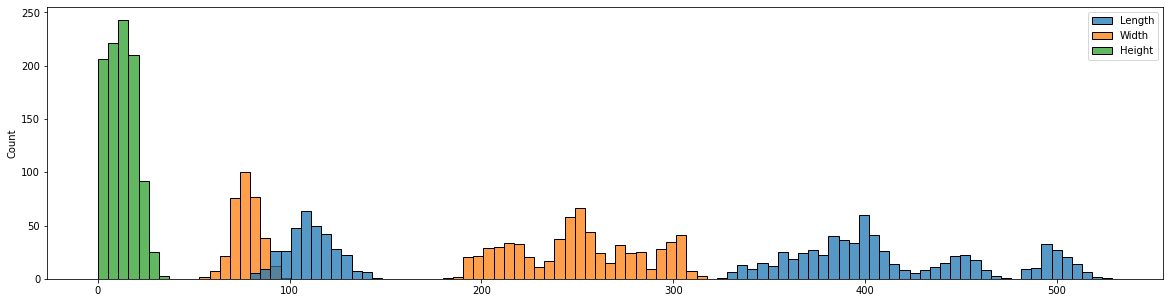

In [16]:
plt.figure(figsize=(20, 5))
sns.histplot(df_skus[['Length', 'Width', 'Height']], bins=100);

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


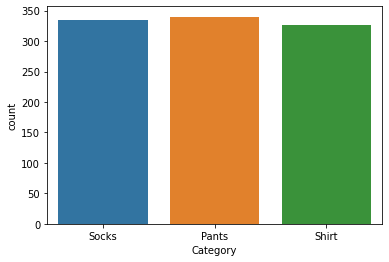

In [17]:
sns.countplot(df_skus['Category']);

In [19]:
df_skus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SKU       1000 non-null   object 
 1   Category  1000 non-null   object 
 2   Size      1000 non-null   object 
 3   Length    1000 non-null   float64
 4   Width     1000 non-null   float64
 5   Height    1000 non-null   float64
dtypes: float64(3), object(3)
memory usage: 87.0+ KB


In [20]:
df_skus.describe()

,Length,Width,Height
count,1000.000000,1000.00000,1000.000000
mean,313.455000,192.85200,12.325000
std,149.595216,86.05263,7.241949
min,81.000000,57.00000,0.000000
25%,119.000000,82.00000,7.000000
50%,379.000000,222.00000,12.000000
75%,414.000000,257.25000,17.000000
max,529.000000,316.00000,33.000000


In [21]:
df_skus_food = random_skus(1000, 'Food')
df_skus_food

,SKU,Category,Size,Length,Width,Height
1,SKU_1,Box of cereals,L,250,150,10
2,SKU_2,Box of cereals,S,250,150,10
3,SKU_3,Bag of rice,S,540,350,250
4,SKU_4,Bag of rice,L,540,350,250
5,SKU_5,Can of tuna,L,110,110,7
...,...,...,...,...,...,...
996,SKU_996,Box of cereals,S,250,150,10
997,SKU_997,Bag of rice,S,540,350,250
998,SKU_998,Box of cereals,M,250,150,10
999,SKU_999,Bag of rice,L,540,350,250


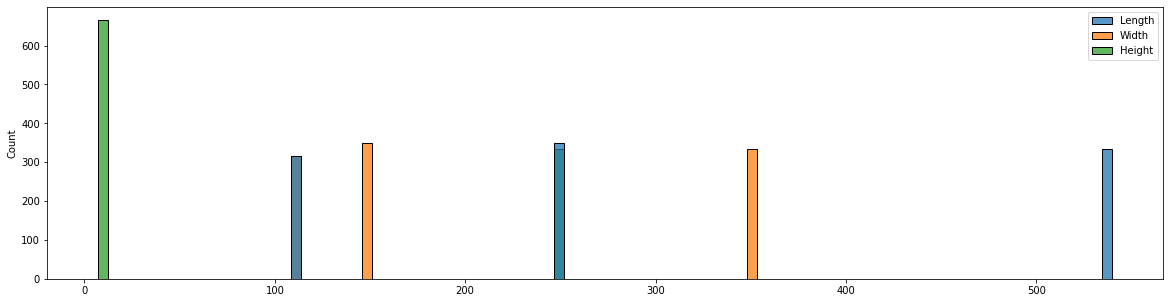

In [22]:
plt.figure(figsize=(20, 5))
sns.histplot(df_skus_food[['Length', 'Width', 'Height']], bins=100);

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


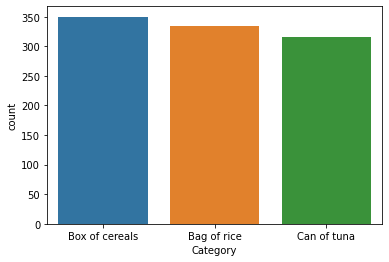

In [24]:
sns.countplot(df_skus_food['Category']);